In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
dataset=pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Description of Columns:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there is no null values in this dataset

<AxesSubplot:xlabel='Outcome', ylabel='count'>

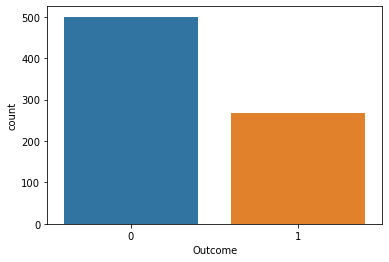

In [8]:
# Visualize the dataset
sns.countplot(dataset['Outcome'])

<AxesSubplot:>

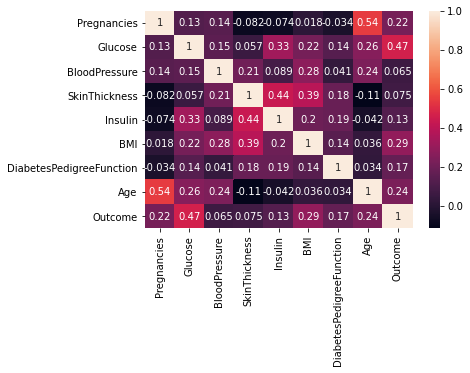

In [9]:
sns.heatmap(dataset.corr(),annot=True)

we can see Glucose having positive correlation with our target and it is obvious.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

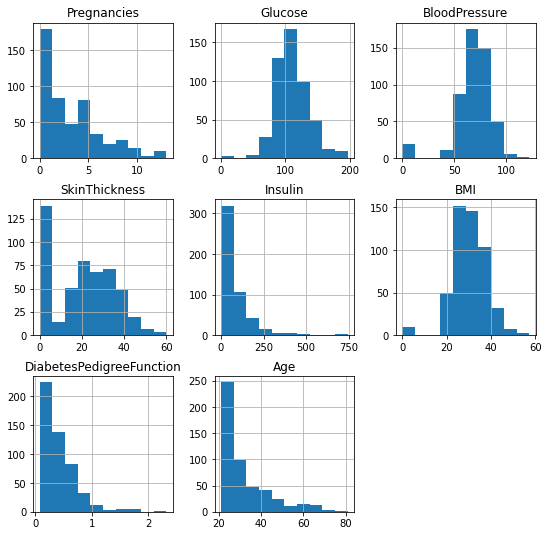

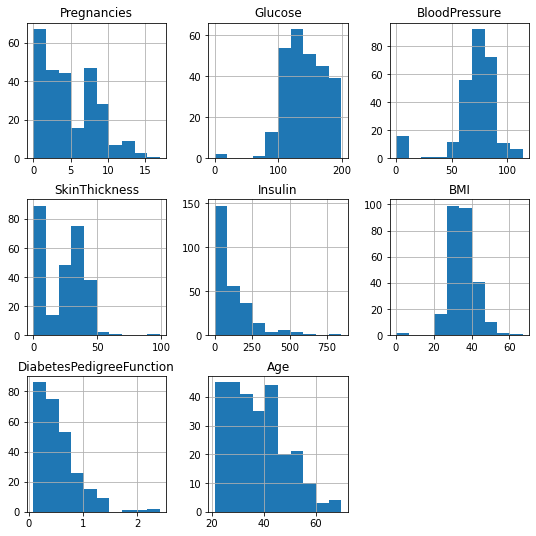

In [10]:
dataset.groupby('Outcome').hist(figsize=(9, 9))

<AxesSubplot:xlabel='Pregnancies'>

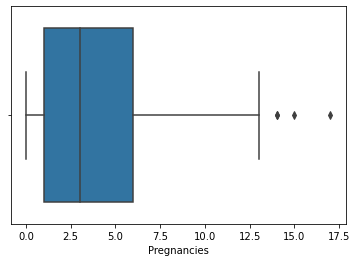

In [11]:
sns.boxplot(dataset['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

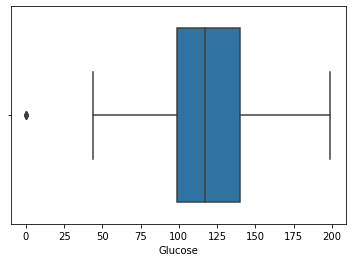

In [12]:
sns.boxplot(x=dataset['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

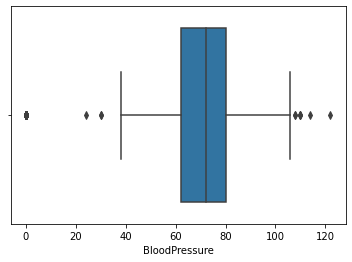

In [13]:
sns.boxplot(x=dataset['BloodPressure'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

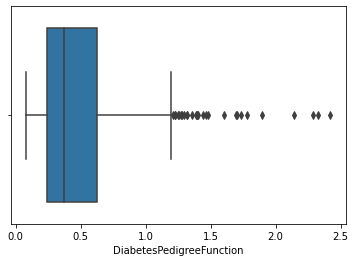

In [14]:
sns.boxplot(x=dataset['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age'>

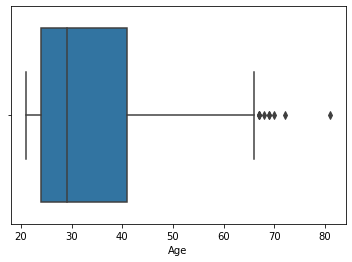

In [15]:
sns.boxplot(x=dataset['Age'])

# detection outliers:

1] a living person cannot have diastolic pressure of zero.

2] Even after fasting glucose levels would not be as low as zero.

3] For normal people, skin fold thickness can’t be less than 10 mm better yet zero.

4] BMI Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.

5] In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 768 counts.

In [16]:
print('total zero Glucose rows :',len(dataset[dataset.Glucose==0]))
dataset[dataset.Glucose==0].groupby('Outcome')['Glucose'].count()

total zero Glucose rows : 5


Outcome
0    3
1    2
Name: Glucose, dtype: int64

In [17]:
print('total zero blood pressure rows :',len(dataset[dataset.BloodPressure==0]))
dataset[dataset.BloodPressure==0].groupby('Outcome')['BloodPressure'].count()

total zero blood pressure rows : 35


Outcome
0    19
1    16
Name: BloodPressure, dtype: int64

In [18]:
print('total zero skinthickness rows :',len(dataset[dataset.SkinThickness==0]))
dataset[dataset.SkinThickness==0].groupby('Outcome')['SkinThickness'].count()

total zero skinthickness rows : 227


Outcome
0    139
1     88
Name: SkinThickness, dtype: int64

In [19]:
print('total zero BMI rows :',len(dataset[dataset.BMI==0]))
dataset[dataset.BMI==0].groupby('Outcome')['BMI'].count()

total zero BMI rows : 11


Outcome
0    9
1    2
Name: BMI, dtype: int64

In [20]:
print('total zero insulin rows :',len(dataset[dataset.Insulin==0]))
dataset[dataset.Insulin==0].groupby('Outcome')['Insulin'].count()

total zero insulin rows : 374


Outcome
0    236
1    138
Name: Insulin, dtype: int64

## We have detected outliers and we can preprocess it by two methods:

1] first we can remove all the ouliers out there but we have less data and it may lose important information as well.

2] we can replace outliers by mean and median, but in our case if we put median or mean values in blood pressure column then it will give us a wrong signal.

I am going to remove zero values from three columns which having less outliers.

In [21]:
data=dataset[(dataset.BloodPressure!=0) & (dataset.Glucose!=0) & (dataset.BMI!=0)]

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.shape

(724, 9)

In [24]:
#split the data
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [25]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
y_test

708    1
415    1
636    0
358    0
40     0
      ..
249    0
536    0
197    1
744    0
35     0
Name: Outcome, Length: 145, dtype: int64

In [28]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
708,9,164,78,0,0,32.8,0.148,45
415,3,173,84,33,474,35.7,0.258,22
636,5,104,74,0,0,28.8,0.153,48
358,12,88,74,40,54,35.3,0.378,48
40,3,180,64,25,70,34.0,0.271,26
...,...,...,...,...,...,...,...,...
249,1,111,86,19,0,30.1,0.143,23
536,0,105,90,0,0,29.6,0.197,46
197,3,107,62,13,48,22.9,0.678,23
744,13,153,88,37,140,40.6,1.174,39


In [29]:
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(),XGBClassifier(),SVC(max_iter=5000,),LinearSVC(max_iter=5000,dual=False),KNeighborsClassifier(),DecisionTreeClassifier()]
names=[]
scores=[]
for model in models:
    model.fit(X_train,y_train.ravel())
    y_pred=model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    names.append(model.__class__.__name__)
    
classifiers=pd.DataFrame({'Algorithms':names,'testing_accuracy': scores})

In [30]:
classifiers

,Algorithms,testing_accuracy
0,LogisticRegression,0.724138
1,RandomForestClassifier,0.779310
2,XGBClassifier,0.765517
3,SVC,0.737931
4,LinearSVC,0.731034
5,KNeighborsClassifier,0.724138
6,DecisionTreeClassifier,0.717241


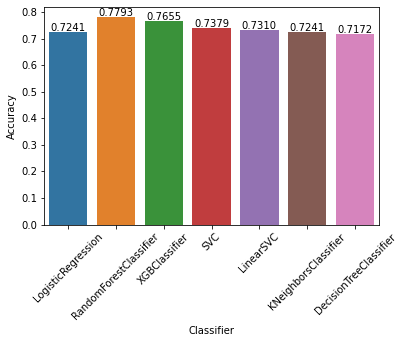

In [31]:
axis=sns.barplot(x = 'Algorithms', y = 'testing_accuracy', data =classifiers)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)
for p in axis.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [37]:
from sklearn.model_selection import RandomizedSearchCV
random=RandomForestClassifier()
param={
    'n_estimators':[x for x in range(1,2000,200)],
    'max_depth':[6,8,10,15,20,25,30,35,40,50,60,70,80],
    'min_samples_split':[1,2,3,5,6,7,8,10,12],
    'min_samples_leaf':[1,2,3,5,6,7,8,10,12,14,15]   
}

randomcv=RandomizedSearchCV(random,param_distributions=param,)

In [46]:
randomcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [6, 8, 10, 15, 20, 25, 30,
                                                      35, 40, 50, 60, 70, 80],
                                        'min_samples_leaf': [1, 2, 3, 5, 6, 7,
                                                             8, 10, 12, 14,
                                                             15],
                                        'min_samples_split': [1, 2, 3, 5, 6, 7,
                                                              8, 10, 12],
                                        'n_estimators': [1, 201, 401, 601, 801,
                                                         1001, 1201, 1401, 1601,
                                                         1801]})

In [45]:
print(randomcv.best_score_)
print(randomcv.best_params_)

0.7738380809595203
{'n_estimators': 401, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_depth': 80}


In [36]:
# we got 77% accuracy after hypertuning the parameter of our RandomForestClassifier
import pickle
filename='diabetes_rfc.pkl'
pickle.dump(model,open(filename,'wb'))